# Experimento I : Validación del artículo "Multiple sclerosis identification by convolutional neural network with dropout and parametric ReLU".

En este experimiento usaremos la infraestructura planteada para comprobar si las ideas del artículo "Multiple sclerosis identification by convolutional neural network with dropout and parametric ReLU" se validan en la red CNN_SOCO, la cual tratamos en el experimento 0.


## Librerías usadas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

## Parámetros globales

In [ ]:
#Rutas de los datos.
 
data_dir = os.path.dirname(os.path.realpath("../TFG/Datos/HAM10000_metadata.csv"))



csv_path = os.path.realpath(data_dir + "/HAM10000_metadata.csv")

#Variables globales

altura = 50
longitud = 50
clases = 7


print(data_dir)

print(csv_path)



/home/antoniojesus/Escritorio/TFG/Datos
/home/antoniojesus/Escritorio/TFG/Datos/HAM10000_metadata.csv


## Creación del marco de datos

In [ ]:
#Inicializando el dataFrame

dataFrame=pd.read_csv(csv_path)

#Mezclando carpetas.

all_image_path = glob(os.path.join(data_dir, '*', '*'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}

# Inicializando diccionario de categorías

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

#Añadiendo columnas al dataFrame para que sea más legible.

dataFrame['path'] = dataFrame['image_id'].map(imageid_path_dict.get)
dataFrame['cell_type'] = dataFrame['dx'].map(lesion_type_dict.get) 
dataFrame['cell_type_idx'] = pd.Categorical(dataFrame['cell_type']).codes
dataFrame.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/antoniojesus/Escritorio/TFG/Datos/HAM100...,Benign keratosis,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/antoniojesus/Escritorio/TFG/Datos/HAM100...,Benign keratosis,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/antoniojesus/Escritorio/TFG/Datos/HAM100...,Benign keratosis,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/antoniojesus/Escritorio/TFG/Datos/HAM100...,Benign keratosis,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/antoniojesus/Escritorio/TFG/Datos/HAM100...,Benign keratosis,2


## Elección de arquitectura

In [ ]:
def select_network(nn_base_arch):
    if nn_base_arch =='CNN_S_MAX':
        nn = cnn_soco()
    if nn_base_arch =='CNN_S_AVG':
        nn = cnn_soco_average()
    if nn_base_arch =='CNN_S_PRELU_MAX':
        nn = cnn_soco_prelu_max()
    if nn_base_arch =='CNN_S_PRELU_AVG':
        nn = cnn_soco_prelu_average()
        
    return nn

In [ ]:
def cnn_soco():
    
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(32, (3,3),(1,1), activation='relu',input_shape=(altura,longitud,3)))
    model.add(tf.keras.layers.Conv2D(32, (3,3),(1,1),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))

 
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    
    print(model.summary())
    
    return model

In [ ]:
def cnn_soco_average():
    
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(32, (3,3),(1,1), activation='relu',input_shape=(altura,longitud,3)))
    model.add(tf.keras.layers.Conv2D(32, (3,3),(1,1),activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D((2,2)))

 
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D((2,2)))
    
    print(model.summary())
    
    return model

def cnn_soco_prelu_max():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(32,(3,3),(1,1),input_shape=(altura,longitud,3)))
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.Conv2D(32,(3,3),(1,1))) 
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    
    model.add(tf.keras.layers.Conv2D(64, (3,3))) 
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    
    print(model.summary())        
              
    return model

def cnn_soco_prelu_average():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(32,(3,3),(1,1),input_shape=(altura,longitud,3)))
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.Conv2D(32,(3,3),(1,1))) 
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.AveragePooling2D((2,2)))
    
    model.add(tf.keras.layers.Conv2D(64, (3,3))) 
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.AveragePooling2D((2,2)))

    print(model.summary())          
    
    return model



In [ ]:
def build(nn):
    model = tf.keras.Sequential()
    model.add(nn)
    model.add(tf.keras.layers.AveragePooling2D((1,1),3))
    
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.Activation('relu'))  
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(clases,activation='softmax'))
  
  

    print(model.summary())

    return model

def build_dense(nn):
    model = tf.keras.Sequential()
    model.add(nn)
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.Activation('relu'))
    
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Dense(clases,activation='softmax'))
  
  

    print(model.summary())

    return model

def build_dense_dropout(nn):
    model = tf.keras.Sequential()
    
    model.add(nn)
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    
    model.add(tf.keras.layers.Dense(clases,activation='softmax'))

    print(model.summary())

    return model

def build_dense_dropout_prelu(nn):
    model = tf.keras.Sequential()
    
    model.add(nn)
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.Dropout(0.4))
    
    model.add(tf.keras.layers.Dense(clases,activation='softmax'))

    print(model.summary())

    return model

## Carga de datos

In [ ]:
def balanced_dataset(df):
    df_balanced = pd.DataFrame()
    #df = pd.DataFrame()
    
    for cat in df['cell_type_idx'].unique():
        temp = resample(df[df['cell_type_idx'] == cat], 
                        replace=True,     # sample with replacement
                        n_samples=2500,   # to match majority class
                        random_state=123) # reproducible results

        # Combine majority class with upsampled minority class
        df_balanced = pd.concat([df_balanced, temp])
 
    df_balanced['cell_type'].value_counts()

    return df_balanced

def load_img_data(size, df, balanced=False):
    """
        ..
        first we should normalize the image from 0-255 to 0-1
    """
    
    img_h, img_w = size, size
    imgs = []
    
    if balanced:
        df = balanced_dataset(df)
    
    image_paths = list(df['path'])

    for i in tqdm(range(len(image_paths))):
        img = cv2.imread(image_paths[i])
        img = cv2.resize(img, (img_h, img_w))
        img = img.astype(np.float32) / 255.
        #img = np.asarray(Image.open(image_paths[i]).resize((size,size)))
        imgs.append(img)

    imgs = np.stack(imgs, axis=0)
    print(imgs.shape)

    #imgs = imgs.astype(np.float32) / 255.
    
    return imgs, df['cell_type_idx'].values

In [ ]:
imgs, target = load_img_data(altura, dataFrame, balanced=True)

100%|██████████| 17500/17500 [03:33<00:00, 82.01it/s] 


(17500, 50, 50, 3)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imgs, target, test_size=0.20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)

train_val_test = (x_train, y_train, x_val, y_val, x_test, y_test)

[x_train.shape, x_val.shape, x_test.shape]

trainX = train_val_test[0]
trainY = train_val_test[1]
valX = train_val_test[2]
valY = train_val_test[3]
testX = train_val_test[4]
testY = train_val_test[5]

numTrainingSamples = trainX.shape[0]
numValidationSamples = valX.shape[0]

## Fase de entrenamiento

In [ ]:
def run_train(nn_base_arch,checkpoint,epocas,mode = False):
    nn = select_network(nn_base_arch)
    
    if mode == 0 :
        model = build(nn)
    if mode == 1 :
        model = build_dense(nn)    
    if mode == 2 :
        model = build_dense_dropout(nn)
        
    if mode == 3 :
        model = build_dense_dropout_prelu(nn)

        
    checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optAMSGrad, metrics=['accuracy','mse'])
    history = model.fit(x_train, y_train,steps_per_epoch=(numTrainingSamples/(mbs*25)),epochs=epocas,validation_data=(valX, valY),callbacks=[checkpoint],batch_size = mbs)
  
    return history

def re_train(model,checkpoint,epocas):
    checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
    history = model.fit(x_train, y_train,steps_per_epoch=(numTrainingSamples/(mbs*25)),epochs=epocas,validation_data=(valX, valY),callbacks=[checkpoint],batch_size = mbs)
  
    return history

### Definición de algunos parámetros importantes

In [ ]:
mini_batch_size =numTrainingSamples/875
mbs=int(mini_batch_size)
mbs


15

In [ ]:
optAMSGrad = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="AMSGrad"

)

RMSpropEstudio = tf.keras.optimizers.RMSprop(
    learning_rate=0.0001
)

### Entrenamiento

In [ ]:
epocas = 500
nn_base_arch = "CNN_S_MAX"
checkpoint ="../TFG/Modelos/Experimento2/balanced_model_"+nn_base_arch+"_AE_ph2_weights.h5"
history = run_train(nn_base_arch,checkpoint,epocas,0)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 64)        0         
Total params: 28,640
Trainable params: 28,640
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_13"
_________________________________________________________________
Layer (type)         

InvalidArgumentError:  Incompatible shapes: [15,10,10,7] vs. [15,1]
	 [[node SquaredDifference (defined at <ipython-input-24-c3b041ad8b35>:17) ]] [Op:__inference_train_function_286294]

Function call stack:
train_function


## Evaluación de resultados

In [ ]:
model = history.model
model.load_weights(checkpoint)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 32)                19392     
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               16896     
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_7 (Activation)    (None, 512)             

In [ ]:
loaded_model = tf.keras.models.load_model(checkpoint)

loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSpropEstudio, metrics=['accuracy'])

In [ ]:
test_eval = loaded_model.evaluate(x_test, y_test)

110/110 [==============================] - 2s 17ms/step - loss: 0.4651 - accuracy: 0.8834


In [ ]:
def plot_acc(history,epochs,name):
    print('\n\n')     
    plt.figure(figsize=(12,8))
    plt.figure(figsize=(12,8))
    plt.plot(np.arange(0, epochs), history.history["loss"][0:epochs], label="train_loss")
    plt.plot(np.arange(0, epochs), history.history["val_loss"][0:epochs], label="val_loss")
    plt.plot(np.arange(0, epochs), history.history["accuracy"][0:epochs], label="train_acc")
    plt.plot(np.arange(0, epochs), history.history["val_accuracy"][0:epochs], label="val_acc")
    plt.title("Training Loss and Accuracy - {}".format(name))
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

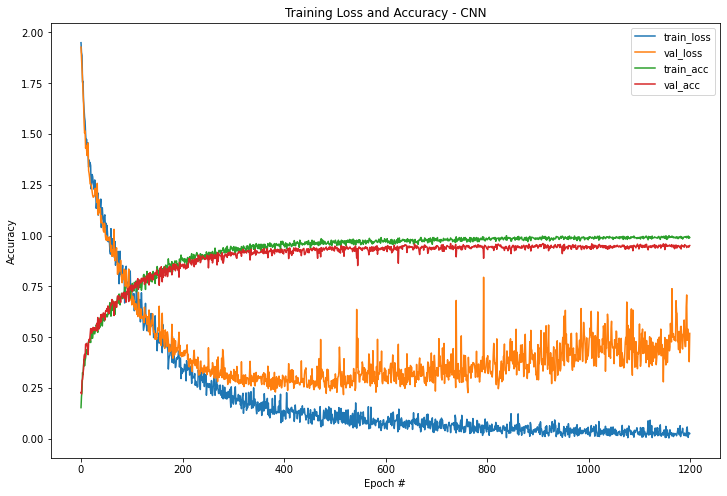

In [ ]:
plot_acc(history,1200,"CNN")